In [1]:
%matplotlib inline

The search for a signal in the baseline was quite unsuccesful, cf other notes about that.
There is still some room for improvement, but we want to get a result and set a method to set limits.  
The main step of this analysis are:
- get the monitoring data (several years)
- clean the data (sun period removal, humidity cut)
- correct for the temperature dependence
- **produce fake baselines**
- add expected signal on the fake baseline
- optimize the search algorithm and define a signal 
- apply the algo to the data
- compare with simulation

#get monitoring baseline/ clean the data/ temperature correction

This is done with Corinne's software "EasierMonitoring" at Lyon.
Now I have only 2014 data. The rest will come soon.  

The cleaning is done according previous study. At the end the cuts that are done are:
- filter the variations longer than 1.5days
- remove the period when we expect the sun contribution to be higher than 2 ADC for a system temperature of 50K
- remove the times when humidity is larger than 50%

The temperature correction is done on the cleaned data for a complete year of data with a linear fit. This was found to do a correct job.

**remark:** there are some possible improvement of these correction. We found earlier that with these correction a modulation remains that seems not depend on the temperature.

#fake baseline production

To produce the fake baselines, we start with the corrected/cleaned data and filtered. 
From this data set, we keep the days that are complete (216 samples) and we recombine one spectrum with one phase. This allow to increase the number of fake baselines.  
In these fake baseline we can add a gaussian signal to simulate the sun transit.  
Here is for instance some example of fake baselines (without and then with a signal)

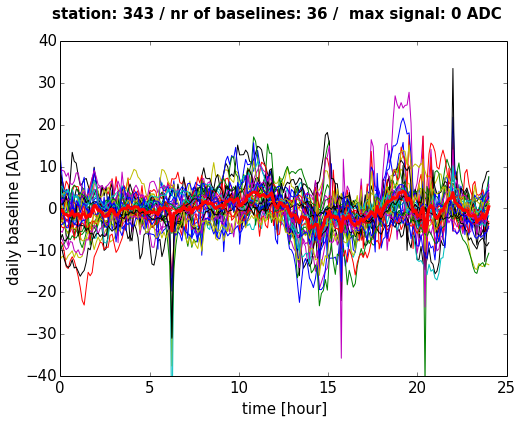

In [3]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run readfakebl.py 343 0

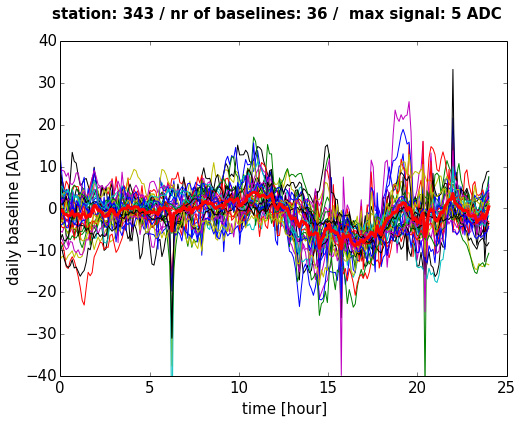

In [6]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run readfakebl.py 343 5

The added signal is a gaussian with centered at 17h and with a sigma of 2h (it was shown to be  always approximately  the same shape in the note "fake monitoring data")

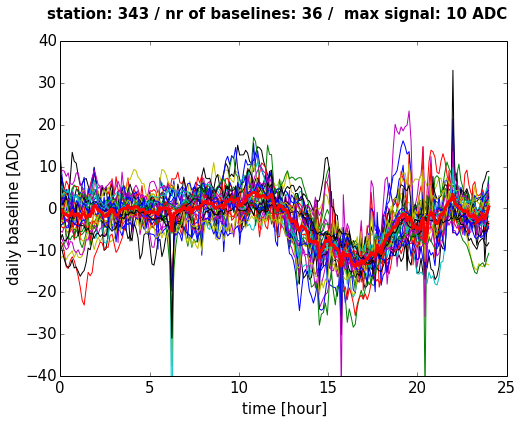

In [7]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run readfakebl.py 343 10

For another station:

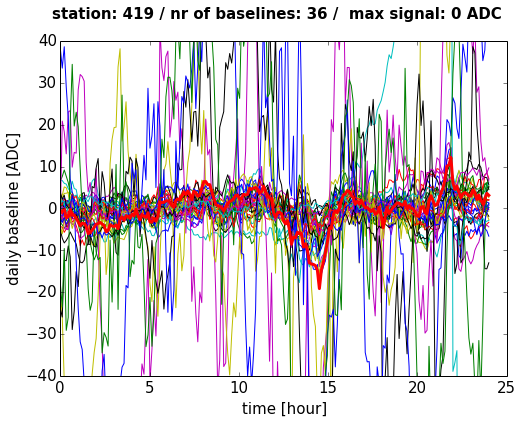

In [13]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run readfakebl.py 419 0

That shows that I still have some strange data with my cleaning.

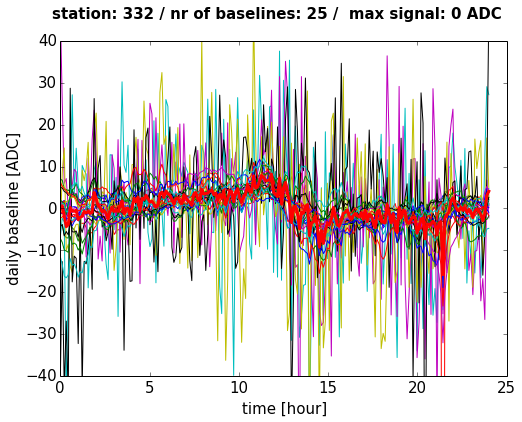

In [14]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run readfakebl.py 332 0

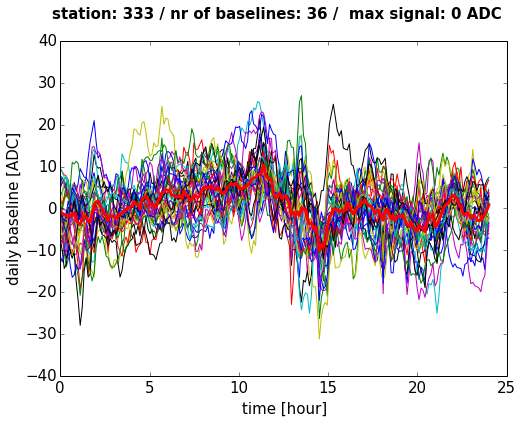

In [15]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run readfakebl.py 333 0

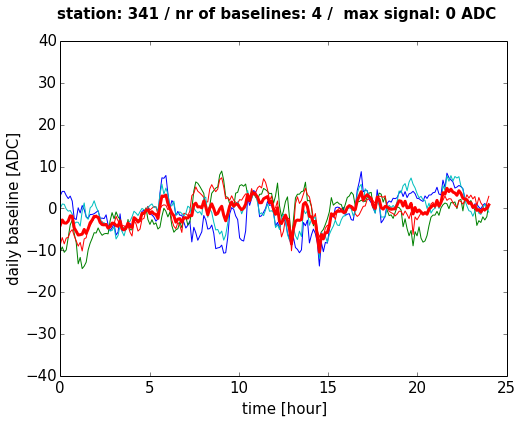

In [16]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run readfakebl.py 341 0

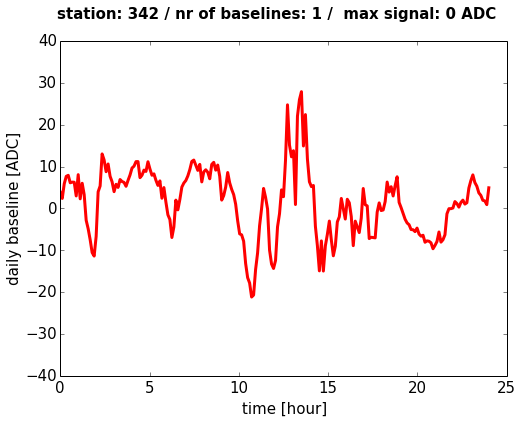

In [17]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run readfakebl.py 342 0

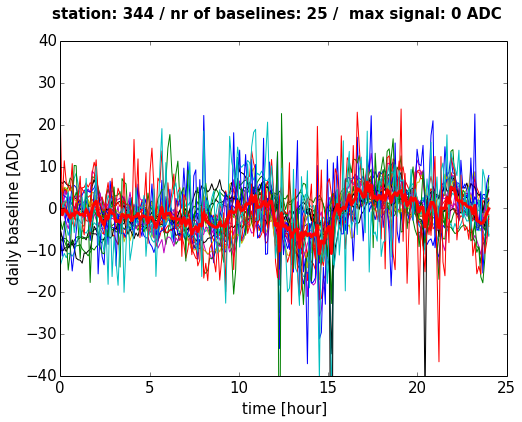

In [18]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run readfakebl.py 344 0

First we focus on the station 343:

#optimize the search algorithm and define a signal

This was also done in "fake monitoring data" note. We test here only the sliding window algo and the matched filter. 

## defining a positive signal

To probe the efficiency of the algorithm, we want first to define a measure of the signal itself. What I had done before is to compare the maximum in time (around 17h) and the maximum out of time (before 10). Now I think I can look how much a daily baseline is distant from the mean + error. I will do both, because the second solution requires a comparison with simulation and the simulation I have, the fake baselines, is not the good I think (the fake baseline are made of real one but only the one that don't have sun in them, i.e. only in june/july/august, I don't know if in other months it is going to be the same.)

###In  time /out time 

We look at the maximum (minimum in fact) before noon and after 15h and compare these two numbers.

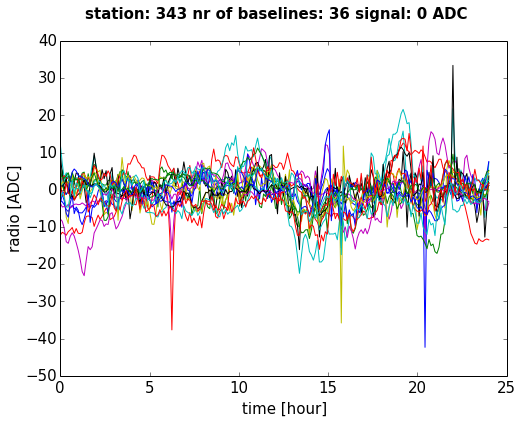

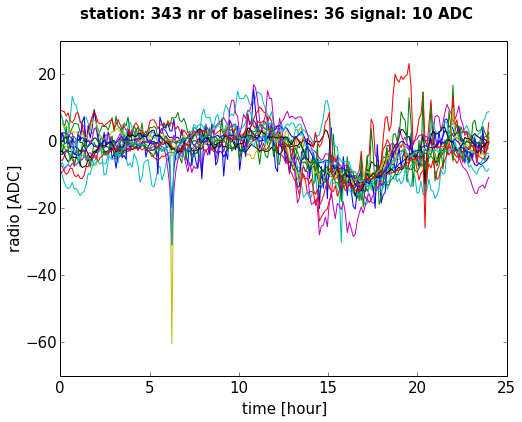

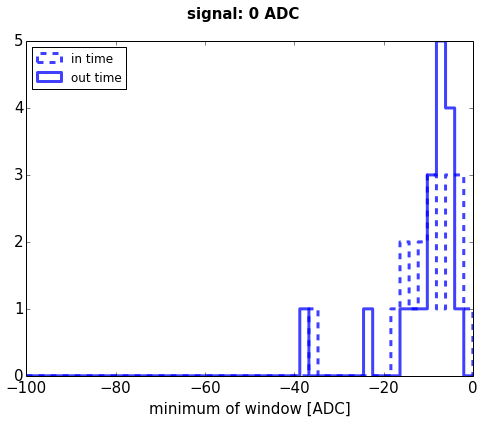

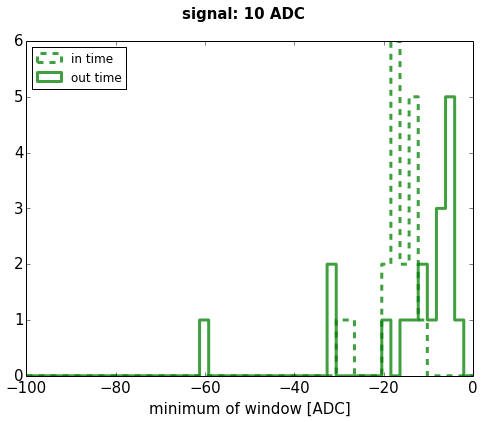

In [27]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run compareinout.py 343 0 10

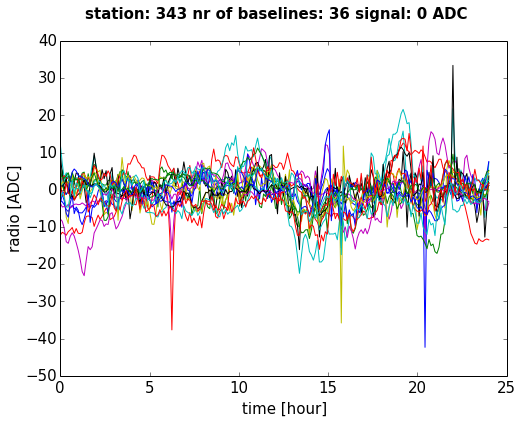

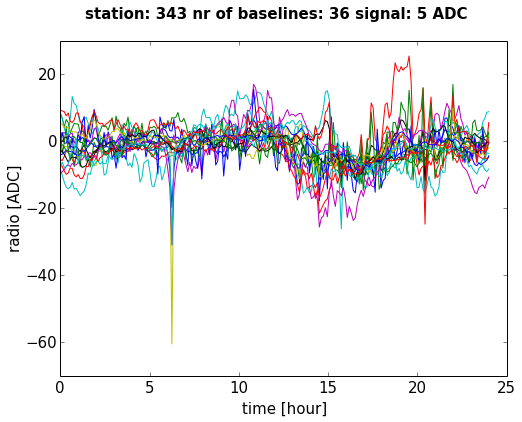

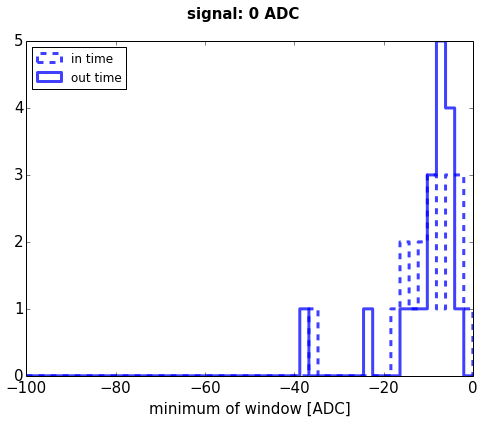

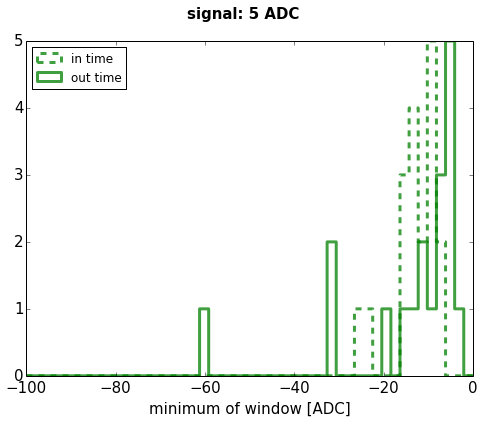

In [28]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run compareinout.py 343 0 5

### comparison with simulation

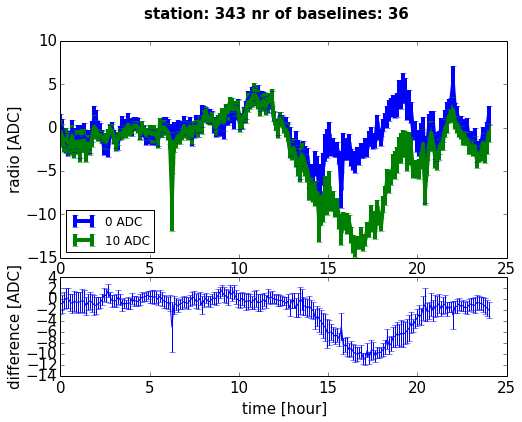

In [29]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run comparefake.py 343 0 10

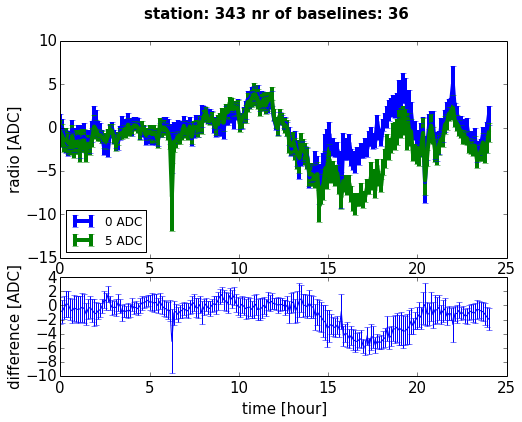

In [30]:
import os
os.chdir('/Users/romain/work/Auger/EASIER/LPSC/monitoring/script/analysis/')
%run comparefake.py 343 0 5

## optimization of the algorithm

We discussed about two possible ways to "filter" the baseline, either by sliding a window of several bins, or by cross correlation with the expected signal.

### sliding window